# Plotting of Field maps
In this notebook, the field maps were plotted for differen locations of the ferromagnetic material, as well as the feld maps of the differences in the field map positions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom

In [2]:
### Parameters: 
Delta_TE = 1.02*1e-3

In [5]:
def field_maps(path_pos1, path_pos2, path_pos3, Delta_TE):
    '''
    Creates and plots field maps where the material is located in three different positions. 
    
    Parameters:
    ----------
    path_pos1: str
        path to the field map where the material is located at position 1
    path_pos2: str
        path to the field map where the material is located at position 2
    path_pos3: str
        path to the field map where the material is located at position 3
    Delta_TE: float
        difference between the echo times
        
    Returns: 
    --------
    gammaB1: list
        list of the field map where the material is located in position 1, rescaled in Hz.
    gammaB2: list
        list of the field map where the material is located in position 2, rescaled in Hz.
    gammaB3: list
        list of the field map where the material is located in position 3, rescaled in Hz.
    '''
    ###Reading the files
    img_pos1 = pydicom.read_file(path_pos1)
    img_pos2 = pydicom.read_file(path_pos2)
    img_pos3 = pydicom.read_file(path_pos3)
    
    ###Rescaling the field map to Hz
    gammaB1 = (img_pos1.pixel_array*(np.pi/4096))/(Delta_TE*2*np.pi)
    gammaB2 = (img_pos2.pixel_array*(np.pi/4096))/(Delta_TE*2*np.pi)
    gammaB3 = (img_pos3.pixel_array*(np.pi/4096))/(Delta_TE*2*np.pi)
    
    ###Subploting the field amps for various positions
    fig = plt.figure(figsize =(15,20) )
    gs = fig.add_gridspec(1, 3, hspace=0, wspace=0.05)
    (ax1, ax2, ax3) = gs.subplots(sharex='col', sharey='row')
    ax1.set_title('Position 1', size = 15)
    ax1.set_xlabel("a)", size = 15)
    ax1.imshow(gammaB1)
    ax2.set_title('Position 2', size = 15)
    ax2.set_xlabel("b)", size = 15)
    ax2.imshow(gammaB2)
    ax3.set_title('Position 3', size = 15)
    ax3.set_xlabel("c)", size = 15)
    im = ax3.imshow(gammaB3)

    for ax in fig.get_axes():
        ax.label_outer()
    axlist = [ax1,ax2,ax3]
    cbar = fig.colorbar(im, ax=axlist, shrink=0.2, aspect=10)
    cbar.set_label(label = f"$\Delta B_0 \gamma$ [Hz] ", size = 15)
    #fig.savefig(f"Results_staticFieldMaps/FieldMaps_12.10.pdf", bbox_inches='tight')
    
    return gammaB1, gammaB2, gammaB3

In [10]:
def complex_division(path_pos1, path_pos2, path_pos3, Delta_TE):
    '''
    Uses complex division to subtract the field maps of two positions, and plots them. 
    
    Parameters:
    ----------
    path_pos1: str
        path to the field map where the material is located at position 1
    path_pos2: str
        path to the field map where the material is located at position 2
    path_pos3: str
        path to the field map where the material is located at position 3
    Delta_TE: float
        difference between the echo times
    
    Returns: 
    -------
    diff_pos3_pos1: list
        list of differences between field map of position 3 and field map of position 1
    diff_pos3_pos2: list
        list of differences between field map of position 3 and field map of position 1
    diff_pos2_pos1: list
        list of differences between field map of position 3 and field map of position 1    
    '''
    ###Read the files
    img_pos1 = pydicom.read_file(path_pos1)
    img_pos2 = pydicom.read_file(path_pos2)
    img_pos3 = pydicom.read_file(path_pos3)
    
    ###Calculates the difference between field maps of different positions
    diff_pos3_pos1 = (np.angle(np.exp(1j*(img_pos3.pixel_array*(np.pi/4096))) / np.exp(1j*(img_pos1.pixel_array*(np.pi/4096)))))/(Delta_TE*2*np.pi)
    diff_pos3_pos2 = (np.angle(np.exp(1j*(img_pos3.pixel_array*(np.pi/4096))) / np.exp(1j*(img_pos2.pixel_array*(np.pi/4096)))))/(Delta_TE*2*np.pi)
    diff_pos2_pos1 = (np.angle(np.exp(1j*(img_pos2.pixel_array*(np.pi/4096))) / np.exp(1j*(img_pos1.pixel_array*(np.pi/4096)))))/(Delta_TE*2*np.pi)
    
    ###Plots the differences
    fig = plt.figure(figsize =(15,20) )
    gs = fig.add_gridspec(1, 3, hspace=0, wspace=0.05)
    (ax1, ax2, ax3) = gs.subplots(sharex='col', sharey='row')
    #fig.suptitle('Sharing x per column, y per row')
    ax1.imshow(diff_pos3_pos1)
    ax1.set_title('Position 3 - Position 1', size = 15)
    ax1.set_xlabel("a)", size = 15)
    ax2.imshow(diff_pos3_pos2)
    ax2.set_title('Position 3 - Position 2', size = 15)
    ax2.set_xlabel("b)", size = 15)
    im = ax3.imshow(diff_pos2_pos1)
    ax3.set_title('Position 2 - Position 1', size = 15)
    ax3.set_xlabel("c)", size = 15)

    for ax in fig.get_axes():
        ax.label_outer()
    axlist = [ax1,ax2,ax3]
    cbar = fig.colorbar(im, ax=axlist, shrink=0.2, aspect=10)
    cbar.set_label(label = f"$\Delta B_0 \gamma$ [Hz] ", size = 15)
    #fig.savefig(f"Results_staticFieldMaps/StaticFieldMapsComp_12.10.png", bbox_inches='tight')
    
    return diff_pos3_pos1, diff_pos3_pos2, diff_pos2_pos1

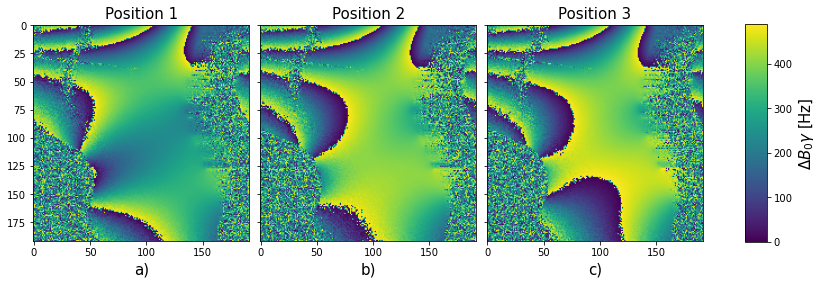

In [8]:
path_img_pos1 = "sub_03/Pos1FA18/BILLY_PHANTOM.MR.JOHANNA_KAMILLA.0014.0005.2023.10.26.17.18.32.287729.7792069.IMA"
path_img_pos2 = "sub_03/Pos3FA18/BILLY_PHANTOM.MR.JOHANNA_KAMILLA.0020.0005.2023.10.26.17.18.32.287729.7796169.IMA"
path_img_pos3 = "sub_03/Pos2FA18/BILLY_PHANTOM.MR.JOHANNA_KAMILLA.0016.0005.2023.10.26.17.18.32.287729.7793095.IMA"
pos1, pos2, pos3 = field_maps(path_img_pos1, path_img_pos2, path_img_pos3, Delta_TE)

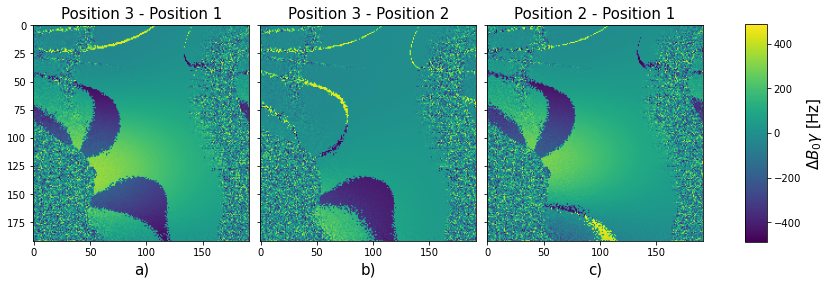

In [12]:
diff_pos3_pos1, diff_pos3_pos2, diff_pos2_pos1 = complex_division(path_img_pos1, path_img_pos2, path_img_pos3, Delta_TE)